In [1]:
import flapjack
from flapjack import registry as reg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
registry = reg.Registry(database_name='data', username='timrudge', password='chicken')

We can now get a pandas dataframe with all the data for a particular plasmid:

In [3]:
df = registry.get_plasmid('pLux76:RFP/pLacI:YFP/std:CFP')
print df.head()

Empty DataFrame
Columns: [measurements_id, measurements_name, measurements_value, measurements_time, measurements_sample_id, samples_id, samples_experiment_id, samples_row, samples_col, samples_media]
Index: []


Pandas allows us to filter, select, group and otherwise manipulate the data set, and provides some plotting functions:

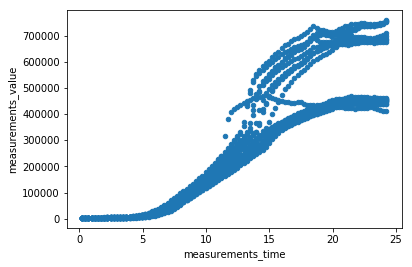

In [10]:
yfp_glicerol = df[(df.measurements_name=='RFP-YFP:500/27,540/25')&(df.samples_media=='M9-glicerol')]
cfp_glicerol = df[(df.measurements_name=='CFP:420/50,485/20')&(df.samples_media=='M9-glicerol')]
od_glicerol = df[(df.measurements_name=='OD600:600')&(df.samples_media=='M9-glicerol')]

yfp_glicerol.plot.scatter(x='measurements_time', y='measurements_value')

Selection of a specific experiment (skip if all data required)

In [11]:
yfp_glic=yfp_glicerol[(yfp_glicerol.samples_experiment_id==4)]
cfp_glic=cfp_glicerol[(cfp_glicerol.samples_experiment_id==4)]
od_glic=od_glicerol[(od_glicerol.samples_experiment_id==4)]

Pandas data series can be directly plotted using Matplotlib/Pyplot:

Text(0,0.5,u'cfp (AU)')

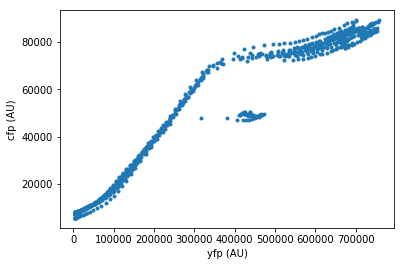

In [12]:
plt.figure()
plt.plot(yfp_glic['measurements_value'], cfp_glic['measurements_value'], '.')
plt.xlabel('yfp (AU)')
plt.ylabel('cfp (AU)')

In the end for complete analysis we can get simple numpy arrays by using the `values` attribute, for example:

Text(0,0.5,u'cfp (AU)')

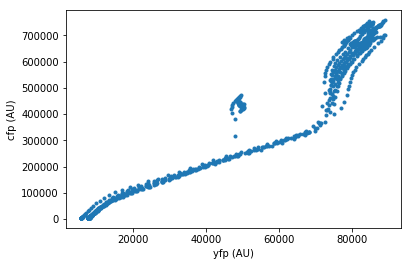

In [14]:
y = yfp_glic['measurements_value'].values
c = cfp_glic['measurements_value'].values
t = cfp_glic['measurements_time'].values
od = od_glic['measurements_value'].values
plt.plot(c,y,'.')
plt.xlabel('yfp (AU)')
plt.ylabel('cfp (AU)')